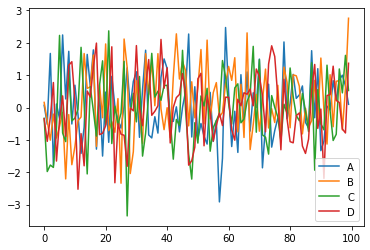

In [1]:
#######
# This script creates a static matplotlib plot
######
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# create fake data:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())
df.plot()
plt.show()
#######
# At the terminal run:  python basic1.py
# Close the plot window to close the script
######


In [2]:
#######
# This script creates the same type of plot as basic1.py,
# but in Plotly. Note that it creates an .html file!
######
import numpy as np
import pandas as pd
import plotly.offline as pyo

# create fake data:
df = pd.DataFrame(np.random.randn(100,4),columns='A B C D'.split())

df


,A,B,C,D
0,-0.359188,1.969218,-0.111273,-0.235987
1,-0.527572,-0.415061,-0.786966,0.275678
2,-1.213615,-0.768380,-1.006256,0.845608
3,0.978490,-1.363942,0.409196,-0.176565
4,1.422178,0.128764,1.295797,-0.049408
...,...,...,...,...
95,0.198960,-0.642720,-0.538663,-0.378329
96,-0.016347,1.089125,0.211105,0.024661
97,-1.483154,0.624294,-0.869156,-0.891176
98,0.583160,-0.301255,0.792967,-0.800293


In [3]:
pyo.plot([{'x': df.index,'y': df[col],'name': col} for col in df.columns])

'temp-plot.html'

Scatter Plot

In [4]:
#######
# This plots 100 random data points (set the seed to 42 to
# obtain the same points we do!) between 1 and 100 in both
# vertical and horizontal directions.
######
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np

np.random.seed(42)
random_x = np.random.randint(1,101,100)
random_y = np.random.randint(1,101,100)

data = [go.Scatter(x = random_x,y = random_y,mode = 'markers',
        marker = dict(size = 15,color = 'rgb(51,204,153)',symbol = 'pentagon',line = dict(width = 5,)))] #as list

layout = go.Layout(
    title = 'Random Data Scatterplot', # Graph title
    xaxis = dict(title = 'Some random x-values'), # x-axis label
    yaxis = dict(title = 'Some random y-values'), # y-axis label
    hovermode ='closest' # handles multiple points landing on the same vertical
) #not as list, layout are extra attributes like title, xlabel, ylabel, 

fig = go.Figure(data=data, layout=layout) #we merge with main data with layout
pyo.plot(fig, filename='scatter3.html')


'scatter3.html'

In [5]:
#Line Chart

In [6]:
#######
# This line chart displays the same data
# three different ways along the y-axis.
######
import plotly.offline as pyo
import plotly.graph_objs as go
import numpy as np

np.random.seed(56)
x_values = np.linspace(0, 1, 100) # 100 evenly spaced values
y_values = np.random.randn(100)   # 100 random values

# create traces for line plots, mode will decide line plot
trace0 = go.Scatter(x = x_values,y = y_values+5,mode = 'markers',name = 'markers')

trace1 = go.Scatter(x = x_values,y = y_values,mode = 'lines+markers',name = 'lines+markers')

trace2 = go.Scatter(x = x_values,y = y_values-5,mode = 'lines',name = 'lines')

data = [trace0, trace1, trace2]  # assign traces to data

layout = go.Layout(title = 'Line chart showing three different modes')

fig = go.Figure(data=data,layout=layout)
pyo.plot(fig, filename='line1.html')


'line1.html'

In [7]:
#######
# This line chart shows U.S. Census Bureau
# population data from six New England states.
# THIS PLOT USES PANDAS TO EXTRACT DESIRED DATA FROM THE SOURCE
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/nst-est2017-alldata.csv')
# Alternatively:
# df = pd.read_csv('https://www2.census.gov/programs-surveys/popest/datasets/2010-2017/national/totals/nst-est2017-alldata.csv')

# grab just the six New England states:
df2 = df[df['DIVISION']=='1']
# set the index to state name:
df2.set_index('NAME', inplace=True)
# grab just the population columns:
df2 = df2[[col for col in df2.columns if col.startswith('POP')]]
df2

,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017
NAME,,,,,,,,
Connecticut,3580171.0,3591927.0,3597705.0,3602470.0,3600188.0,3593862.0,3587685.0,3588184.0
Maine,1327568.0,1327968.0,1328101.0,1327975.0,1328903.0,1327787.0,1330232.0,1335907.0
Massachusetts,6564943.0,6612178.0,6659627.0,6711138.0,6757925.0,6794002.0,6823721.0,6859819.0
New Hampshire,1316700.0,1318345.0,1320923.0,1322622.0,1328684.0,1330134.0,1335015.0,1342795.0
Rhode Island,1053169.0,1052154.0,1052761.0,1052784.0,1054782.0,1055916.0,1057566.0,1059639.0
Vermont,625842.0,626210.0,625606.0,626044.0,625665.0,624455.0,623354.0,623657.0


In [8]:
traces=[go.Scatter(x = df2.columns,y = df2.loc[name],mode = 'markers+lines',name = name) for name in df2.index]

layout = go.Layout(title = 'Population Estimates of the Six New England States')

fig = go.Figure(data=traces,layout=layout)
pyo.plot(fig, filename='line3.html')


'line3.html'

In [9]:
df = pd.read_csv('Data/2010YumaAZ.csv')
days = ['TUESDAY','WEDNESDAY','THURSDAY','FRIDAY','SATURDAY','SUNDAY','MONDAY']
df

,LST_DATE,DAY,LST_TIME,T_HR_AVG
0,20100601,TUESDAY,0:00,25.2
1,20100601,TUESDAY,1:00,24.1
2,20100601,TUESDAY,2:00,24.4
3,20100601,TUESDAY,3:00,24.9
4,20100601,TUESDAY,4:00,22.8
...,...,...,...,...
163,20100607,MONDAY,19:00,39.4
164,20100607,MONDAY,20:00,38.5
165,20100607,MONDAY,21:00,37.0
166,20100607,MONDAY,22:00,34.7


In [10]:
data = []

for day in days:
    trace = go.Scatter(x=df['LST_TIME'], y=df[df['DAY']==day]['T_HR_AVG'],mode='lines',name=day)
    data.append(trace)
data #list

[Scatter({
     'mode': 'lines',
     'name': 'TUESDAY',
     'x': array(['0:00', '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00',
                 '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00',
                 '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '0:00',
                 '1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00',
                 '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00',
                 '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '0:00', '1:00',
                 '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00',
                 '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00',
                 '19:00', '20:00', '21:00', '22:00', '23:00', '0:00', '1:00', '2:00',
                 '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00',
                 '11:00', '12:00', '13:00', '14:00', '15:00', '16:

In [11]:
# Define the layout
layout = go.Layout(
    title='Daily temperatures from June 1-7, 2010 in Yuma, Arizona',
    hovermode='closest'
)

# Create a fig from data and layout, and plot the fig
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='solution2a.html')

'solution2a.html'

In [12]:
#Else 

data = [{'x': df['LST_TIME'],'y': df[df['DAY']==day]['T_HR_AVG'],'name': day} for day in df['DAY'].unique()]
print(data) without go.Scatter ie more Pandas

# Create a fig from data and layout, and plot the fig
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='solution2b.html')

SyntaxError: invalid syntax (Temp/ipykernel_5140/326499334.py, line 4)

In [13]:
#Bar Chart

In [16]:
#######
# A basic bar chart showing the total number of
# 2018 Winter Olympics Medals won by Country.
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/2018WinterOlympics.csv')
df.head()

,Rank,NOC,Gold,Silver,Bronze,Total
0,1,Norway,14,14,11,39
1,2,Germany,14,10,7,31
2,3,Canada,11,8,10,29
3,4,United States,9,8,6,23
4,5,Netherlands,8,6,6,20


In [19]:
data = [go.Bar(x=df['NOC'], y=df['Total'])]  # NOC stands for National Olympic Committeey=df['Total'])]
               
layout = go.Layout(title='2018 Winter Olympic Medals by Country')
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='bar1.html')


'bar1.html'

In [20]:
#######
# This is a grouped bar chart showing three traces
# (gold, silver and bronze medals won) for each country
# that competed in the 2018 Winter Olympics.
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/2018WinterOlympics.csv')

trace1 = go.Bar(
    x=df['NOC'],  # NOC stands for National Olympic Committee
    y=df['Gold'],
    name = 'Gold',
    marker=dict(color='#FFD700') # set the marker color to gold
)
trace2 = go.Bar(
    x=df['NOC'],
    y=df['Silver'],
    name='Silver',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace3 = go.Bar(
    x=df['NOC'],
    y=df['Bronze'],
    name='Bronze',
    marker=dict(color='#CD7F32') # set the marker color to bronze
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    title='2018 Winter Olympic Medals by Country'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='bar2.html')


'bar2.html'

In [22]:
#######
# This is a stacked bar chart showing three traces
# (gold, silver and bronze medals won) for each country
# that competed in the 2018 Winter Olympics.
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/2018WinterOlympics.csv')

trace1 = go.Bar(
    x=df['NOC'],  # NOC stands for National Olympic Committee
    y=df['Gold'],
    name = 'Gold',
    marker=dict(color='#FFD700') # set the marker color to gold
)
trace2 = go.Bar(
    x=df['NOC'],
    y=df['Silver'],
    name='Silver',
    marker=dict(color='#9EA0A1') # set the marker color to silver
)
trace3 = go.Bar(
    x=df['NOC'],
    y=df['Bronze'],
    name='Bronze',
    marker=dict(color='#CD7F32') # set the marker color to bronze
)
data = [trace1, trace2, trace3]
layout = go.Layout(
    title='2018 Winter Olympic Medals by Country',
    barmode='stack'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='bar3.html')


'bar3.html'

In [27]:
#######
# This is a grouped bar chart showing three traces
# (gold, silver and bronze medals won) for each country
# that competed in the 2018 Winter Olympics.
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/mocksurvey.csv',index_col=0)
df


,Strongly Agree,Somewhat Agree,Neutral,Somewhat Disagree,Strongly Disagree
Question 1,0.45,0.25,0.10,0.12,0.08
Question 2,0.12,0.07,0.48,0.18,0.15
Question 3,0.05,0.22,0.19,0.23,0.31


In [34]:

# trace= [go.Bar(y=df.index,x=df[response],name=response,orientation='h') for response in df.columns]


# layout = go.Layout(
#     title='2018 Winter Olympic Medals by Country',
#     barmode='stack'
# )
# fig = go.Figure(data=trace, layout=layout)
# pyo.plot(fig, filename='response.html')


#or

trace= [go.Bar(x=df.index,y=df[response],name=response) for response in df.columns]


layout = go.Layout(
    title='2018 Winter Olympic Medals by Country',
)
fig = go.Figure(data=trace, layout=layout)
pyo.plot(fig, filename='response.html')


'response.html'

In [35]:
#Bubble Chart

In [39]:
#######
# A bubble chart is simply a scatter plot
# with the added feature that the size of the
# marker can be set by the data.
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/mpg.csv')

data = [go.Scatter( x=df['horsepower'],y=df['mpg'],text=df['name'],mode='markers',
                   marker=dict(size=1.5*df['cylinders']))] #text will give name on hover
                    #marker will decide bubble size

layout = go.Layout(
    title='Vehicle mpg vs. horsepower',
    xaxis = dict(title = 'horsepower'), # x-axis label
    yaxis = dict(title = 'mpg'),        # y-axis label
    hovermode='closest'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='bubble1.html')


'bubble1.html'

In [47]:
#######
# A bubble chart is simply a scatter plot
# with the added feature that the size of the
# marker can be set by the data.
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/mpg.csv')

# Add columns to the DataFrame to convert model year to a string and
# then combine it with name so that hover text shows both:
df['text1']=pd.Series(df['model_year'],dtype=str)
df['text2']="'"+df['text1']+" "+df['name']

data = [go.Scatter(
            x=df['horsepower'],
            y=df['mpg'],
            text=df['text2'],  # use the new column for the hover text
            mode='markers',
            marker=dict(size=1.5*df['cylinders'],color=df['cylinders'],showscale=True)
            
    )]
layout = go.Layout(
    title='Vehicle mpg vs. horsepower Bubble Chart',
    hovermode='closest' #x,y,closest --> closest x,closest y, closest value to mouse cursor will be shown as hover
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='bubble2.html')


'bubble2.html'

In [49]:
#######
# A bubble chart is simply a scatter plot
# with the added feature that the size of the
# marker can be set by the data.
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/mpg.csv')

df.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [50]:


# Add columns to the DataFrame to convert model year to a string and
# then combine it with name so that hover text shows both:
df['text1']=pd.Series(df['model_year'],dtype=str)
df['text2']="'"+df['text1']+" "+df['name']

data = [go.Scatter(x=df['mpg'],y=df['displacement'],text=df['text2'],  # use the new column for the hover text
            mode='markers',
            marker=dict(size=1.5*df['acceleration'],color=df['cylinders'],showscale=True)
            
    )]
layout = go.Layout(
    title='Vehicle mpg vs. horsepower Bubble Chart',
    xaxis = dict(title = 'displacement'),
    yaxis = dict(title = 'acceleration = seconds to reach 60mph'),
    hovermode='closest' #x,y,closest --> closest x,closest y, closest value to mouse cursor will be shown as hover
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='bubble2.html')

'bubble2.html'

In [51]:
#Box Plot

In [58]:
#######
# This simple box plot places the box beside
# the original data points on the same graph.
######
import plotly.offline as pyo
import plotly.graph_objs as go

# set up an array of 20 data points, with 20 as the median value
y = [1,14,14,15,16,18,18,19,19,20,20,23,24,26,27,27,28,29,33,54,100]

data = [
    go.Box(y=y,
        boxpoints='all', # display the original data points next to boxplot
        jitter=0.8,      # spread them out so they all appear, useful for lot of data points
        pointpos=+1.8    # show all the points ie offset them to the right of the boxplot
    )
]
pyo.plot(data, filename='box1.html')


'box1.html'

In [59]:
#######
# This simple box plot displays outliers
# above and below the box.
######
import plotly.offline as pyo
import plotly.graph_objs as go

# set up an array of 20 data points, with 20 as the median value
y = [1,14,14,15,16,18,18,19,19,20,20,23,24,26,27,27,28,29,33,54]

data = [
    go.Box(
        y=y,
        boxpoints='outliers' # display only outlying data points
    )
]
pyo.plot(data, filename='box2.html')


'box2.html'

In [60]:
#######
# This plot compares sample distributions
# of three-letter-words in the works of
# Quintus Curtius Snodgrass and Mark Twain
######
import plotly.offline as pyo
import plotly.graph_objs as go

snodgrass = [.209,.205,.196,.210,.202,.207,.224,.223,.220,.201]
twain = [.225,.262,.217,.240,.230,.229,.235,.217]

data = [
    go.Box(
        y=snodgrass,
        name='QCS'
    ),
    go.Box(
        y=twain,
        name='MT'
    )
]
layout = go.Layout(
    title = 'Comparison of three-letter-word frequencies<br>\
    between Quintus Curtius Snodgrass and Mark Twain'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='box3.html')


'box3.html'

In [1]:
#Histogram

In [4]:
#######
# This histogram looks back at the mpg dataset
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/mpg.csv')

data = [go.Histogram(
    x=df['mpg'],xbins=dict(start=2,end=20,size=10),
)] #size is each bin = 10 means range of 10 mpg

layout = go.Layout(
    title="Miles per Gallon Frequencies of<br>\
    1970's Era Vehicles"
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='basic_histogram.html')


'basic_histogram.html'

In [9]:
#######
# This histogram compares heights by gender
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/arrhythmia.csv')

data = [go.Histogram(
    x=df[df['Sex']==0]['Height'],
    opacity=0.75,
    name='Male',
    nbinsx=60
),
go.Histogram(
    x=df[df['Sex']==1]['Height'],
    opacity=0.75,
    name='Female'
)]

layout = go.Layout(
    barmode='overlay',
    title="Height comparison by gender"
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='basic_histogram2.html')


'basic_histogram2.html'

In [10]:
#######
# This bar chart mimics a histogram as the x-axis
# is a continuous time series, and the y-axis sums
# a frequency that is already part of the dataset
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/FremontBridgeBicycles.csv')

# Convert the "Date" text column to a Datetime series:
df['Date'] = pd.to_datetime(df['Date'])

# Add a column to hold the hour:
df['Hour']=df['Date'].dt.time

# Let pandas perform the aggregation
df2 = df.groupby('Hour').sum()

trace1 = go.Bar(
    x=df2.index,
    y=df2['Fremont Bridge West Sidewalk'],
    name="Southbound",
    width=1  # eliminates space between adjacent bars
)
trace2 = go.Bar(
    x=df2.index,
    y=df2['Fremont Bridge East Sidewalk'],
    name="Northbound",
    width=1
)
data = [trace1, trace2]

layout = go.Layout(
    title='Fremont Bridge Bicycle Traffic by Hour',
    barmode='stack'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='fremont_bridge.html')


'fremont_bridge.html'

In [12]:
#######
# This histogram compares heights by gender
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/abalone.csv')
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [14]:

data = [go.Histogram(x=df['length'],xbins=dict(start=0,end=1,size=0.02))]
        
layout = go.Layout(
    barmode='overlay',
    title="Length"
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='basic_histogram2.html')

'basic_histogram2.html'

In [15]:
#Displot

In [18]:
#######
# This distplot uses plotly's Figure Factory
# module in place of Graph Objects
######
import plotly.offline as pyo
import plotly.figure_factory as ff #for more complex figures
import numpy as np

x = np.random.randn(1000)
hist_data = [x]
group_labels = ['distplot']

fig = ff.create_distplot(hist_data, group_labels)
pyo.plot(fig, filename='basic_distplot.html')

'basic_distplot.html'

In [19]:
#######
# This distplot demonstrates that random samples
# seldom fit a "normal" distribution.
######
import plotly.offline as pyo
import plotly.figure_factory as ff
import numpy as np

x1 = np.random.randn(200)-2
x2 = np.random.randn(200)
x3 = np.random.randn(200)+2
x4 = np.random.randn(200)+4

hist_data = [x1,x2,x3,x4]
group_labels = ['Group1','Group2','Group3','Group4']

fig = ff.create_distplot(hist_data, group_labels,bin_size=[2,1,3,4])
pyo.plot(fig, filename='multiset_distplot.html')


'multiset_distplot.html'

In [20]:
#######
# This distplot looks back at the Mark Twain/
# Quintus Curtius Snodgrass data and tries
# to compare them.
######
import plotly.offline as pyo
import plotly.figure_factory as ff

snodgrass = [.209,.205,.196,.210,.202,.207,.224,.223,.220,.201]
twain = [.225,.262,.217,.240,.230,.229,.235,.217]

hist_data = [snodgrass,twain]
group_labels = ['Snodgrass','Twain']

fig = ff.create_distplot(hist_data, group_labels, bin_size=[.005,.005])
pyo.plot(fig, filename='SnodgrassTwainDistplot.html')


'SnodgrassTwainDistplot.html'

In [27]:
#######
# Objective: Using the iris dataset, develop a Distplot
# that compares the petal lengths of each class.
# File: '../data/iris.csv'
# Fields: 'sepal_length','sepal_width','petal_length','petal_width','class'
# Classes: 'Iris-setosa','Iris-versicolor','Iris-virginica'
######

# Perform imports here:
import plotly.offline as pyo
import plotly.figure_factory as ff
import pandas as pd

# create a DataFrame from the .csv file:
df = pd.read_csv('Data/iris.csv')

# Define the traces
trace0 = df[df['class']=='Iris-setosa']['petal_length']
trace1 = df[df['class']=='Iris-versicolor']['petal_length']
trace2 = df[df['class']=='Iris-virginica']['petal_length']

# Define a data variable
hist_data = [trace0, trace1, trace2]
group_labels = ['Iris Setosa','Iris Versicolor','Iris Virginica']

# Create a fig from data and layout, and plot the fig
fig = ff.create_distplot(hist_data, group_labels)
pyo.plot(fig, filename='solution7.html')

########
# Great! This shows that if given a flower with a petal length
# between 1-2cm, it is almost certainly an Iris Setosa!
######


'solution7.html'

In [28]:
#Heatmap

In [29]:
#######
# Heatmap of temperatures for Santa Barbara, California
######
import plotly.offline as pyo
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('Data/2010SantaBarbaraCA.csv')

data = [go.Heatmap(
    x=df['DAY'],
    y=df['LST_TIME'],
    z=df['T_HR_AVG'],
    colorscale='Jet'
)]#z is color

layout = go.Layout(
    title='Hourly Temperatures, June 1-7, 2010 in<br>\
    Santa Barbara, CA USA'
)
fig = go.Figure(data=data, layout=layout)
pyo.plot(fig, filename='Santa_Barbara.html')


'Santa_Barbara.html'

In [35]:
#######
# Side-by-side heatmaps for Sitka, Alaska,
# Santa Barbara, California and Yuma, Arizona
# using a shared temperature scale.
######
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly import tools
import pandas as pd

df1 = pd.read_csv('Data/2010SitkaAK.csv')
df2 = pd.read_csv('Data/2010SantaBarbaraCA.csv')
df3 = pd.read_csv('Data/2010YumaAZ.csv')

trace1 = go.Heatmap(
    x=df1['DAY'],
    y=df1['LST_TIME'],
    z=df1['T_HR_AVG'],
    colorscale='Jet',
    zmin = 5, zmax = 40 # add max/min color values to make each plot consistent
)
trace2 = go.Heatmap(
    x=df2['DAY'],
    y=df2['LST_TIME'],
    z=df2['T_HR_AVG'],
    colorscale='Jet',
    zmin = 5, zmax = 40 #min and max color values
)
trace3 = go.Heatmap(
    x=df3['DAY'],
    y=df3['LST_TIME'],
    z=df3['T_HR_AVG'],
    colorscale='Jet',
    zmin = 5, zmax = 40
)

fig = tools.make_subplots(rows=1, cols=3,
    subplot_titles=('Sitka, AK','Santa Barbara, CA', 'Yuma, AZ'),
    shared_yaxes = True,  # this makes the hours appear only on the left
)
fig.append_trace(trace1, 1, 1) #row1,col1
fig.append_trace(trace2, 1, 2)#row1,col2
fig.append_trace(trace3, 1, 3)#row1,col3

fig['layout'].update(title='Hourly Temperatures, June 1-7, 2010')
pyo.plot(fig, filename='AllThree.html')

'AllThree.html'